In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
from sklearn.datasets import load_iris
datasets=load_iris()
data=datasets.data

In [85]:
df=pd.DataFrame(data,columns=datasets.feature_names)

In [86]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

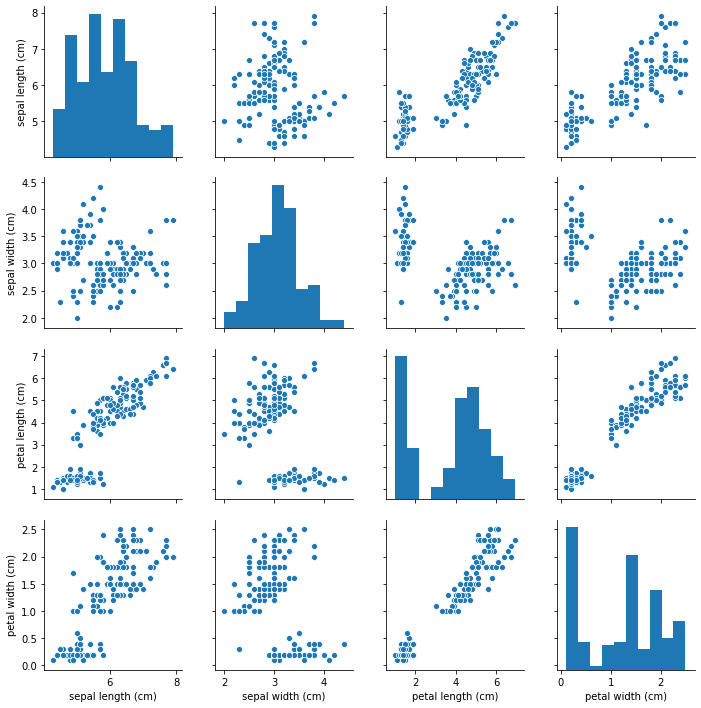

In [87]:
sns.pairplot(df)

In [91]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=22)#8 is default
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [93]:
df['class']=km.predict(df)

c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\chinmay maganur\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


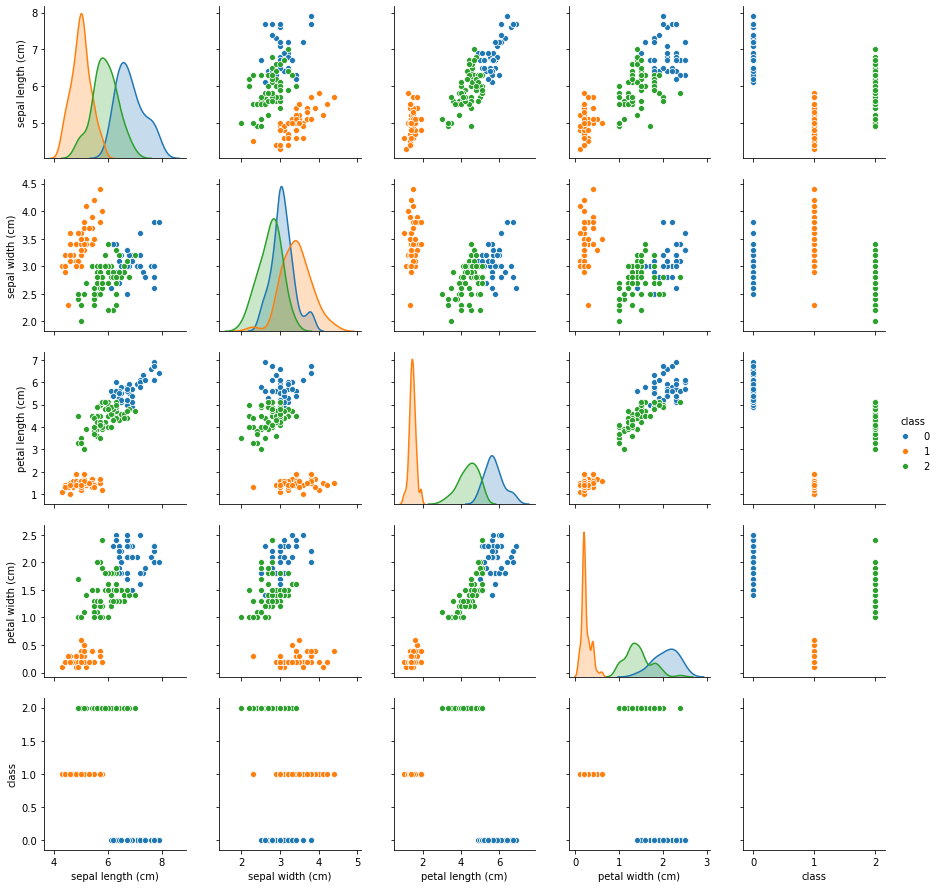

In [96]:
sns.pairplot(df,hue='class')

In [99]:
km.inertia_

78.85144142614601

In [112]:
#plotting n_cluster vs inertia
inertia=[]
for n_clus in range(2,20):
    km=KMeans(n_clusters=n_clus,random_state=22)#8 is default
    km.fit(df)
    inertia.append(km.inertia_)

Text(0, 0.5, 'inertia')

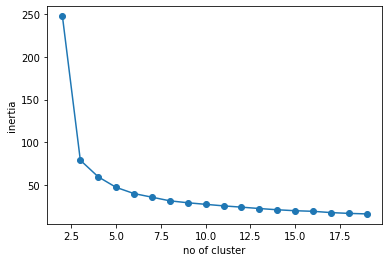

In [118]:
plt.plot(np.arange(2,20),inertia,marker='o')
plt.xlabel('no of cluster')
plt.ylabel('inertia')

In [128]:
def standardize_labels(x):
    if x==1:
        return 0
    elif x==2:
        return 1
    else:
        return 2
df['class'] =df['class'].apply(lambda x: standardize_labels(x))  

In [129]:
df['real_class']=datasets.target
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(df['real_class'],df['class']))
print(classification_report(df['real_class'],df['class']))


[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



In [130]:
accuracy_score(df['real_class'],df['class'])

0.8933333333333333